In [10]:
import pandas as pd
import seaborn as sb

In [11]:
df_path = '../../data/whisper-medium-runs.csv'
df = pd.read_csv(df_path)
df.head()

,step,tag,value,experiment_name,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda
0,0,eval/fl_en-en_cer,0.070265,whisper-medium-tira-croatian,NaN,False,croatian,False,NaN,NaN
1,1000,eval/fl_en-en_cer,0.109744,whisper-medium-tira-croatian,NaN,False,croatian,False,NaN,NaN
2,2000,eval/fl_en-en_cer,0.163511,whisper-medium-tira-croatian,NaN,False,croatian,False,NaN,NaN
3,3000,eval/fl_en-en_cer,0.116702,whisper-medium-tira-croatian,NaN,False,croatian,False,NaN,NaN
4,4000,eval/fl_en-en_cer,0.163945,whisper-medium-tira-croatian,NaN,False,croatian,False,NaN,NaN


In [12]:
# so we can compare no LID loss to using LID loss
df['lid_loss_alpha']=df['lid_loss_alpha'].fillna(0)

Text(0.5, 1.0, 'Performance on English while decoding as Yoruba')

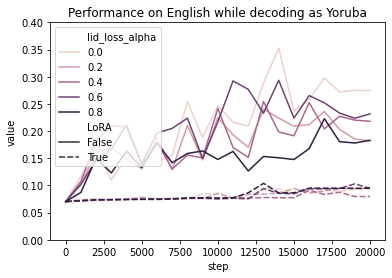

In [13]:
ax=sb.lineplot(
    df[
        (df['tag']=='eval/fl_en-en_cer') &
        (df['lang_prompt']=='yoruba')
    ],
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    style='LoRA',
)
ax.set(ylim=(0, 0.4))
ax.set_title('Performance on English while decoding as Yoruba')

Text(0.5, 1.0, 'Performance on Tira while decoding as Yoruba')

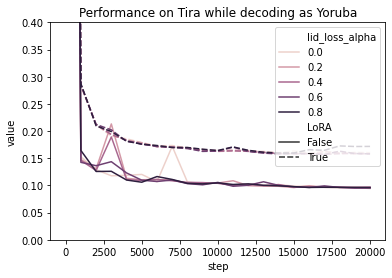

In [ ]:
ax=sb.lineplot(
    df[
        (df['tag']=='eval/tira-clean-split-yoruba_cer') &
        (df['lang_prompt']=='yoruba')
    ],
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    style='LoRA',
)
ax.set(ylim=(0, 0.4))
ax.set_title('Performance on Tira while decoding as Yoruba')

Text(0.5, 1.0, 'Performance on English while decoding as Swahili')

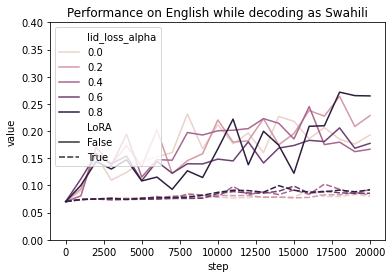

In [15]:
ax=sb.lineplot(
    df[
        (df['tag']=='eval/fl_en-en_cer') &
        (df['lang_prompt']=='swahili')
    ],
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    style='LoRA',
)
ax.set(ylim=(0, 0.4))
ax.set_title('Performance on English while decoding as Swahili')

Text(0.5, 1.0, 'Performance on Tira while decoding as Swahili')

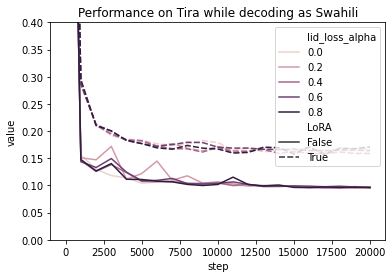

In [16]:
ax=sb.lineplot(
    df[
        (df['tag']=='eval/tira-clean-split-swahili_cer') &
        (df['lang_prompt']=='swahili')
    ],
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    style='LoRA',
)
ax.set(ylim=(0, 0.4))
ax.set_title('Performance on Tira while decoding as Swahili')

Text(0.5, 1.0, 'Performance on English while decoding as Croatian')

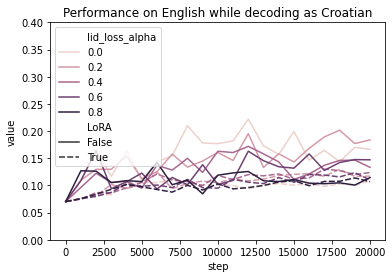

In [17]:
ax=sb.lineplot(
    df[
        (df['tag']=='eval/fl_en-en_cer') &
        (df['lang_prompt']=='croatian')
    ],
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    style='LoRA',
)
ax.set(ylim=(0, 0.4))
ax.set_title('Performance on English while decoding as Croatian')

Text(0.5, 1.0, 'Performance on Tira while decoding as Yoruba')

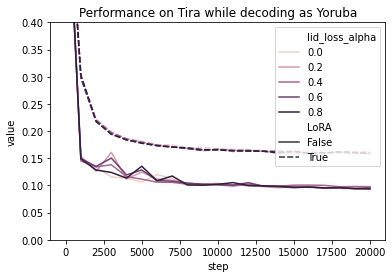

In [18]:
ax=sb.lineplot(
    df[
        (df['tag']=='eval/tira-clean-split-croatian_cer') &
        (df['lang_prompt']=='croatian')
    ],
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    style='LoRA',
)
ax.set(ylim=(0, 0.4))
ax.set_title('Performance on Tira while decoding as Yoruba')

# Langtoken experiments

In [25]:
df.loc[~df['embedding_distance_regularization_type'].isna(), 'tag'].value_counts()

tag
train/epoch                                         384
eval/fl_en-en_cer                                   168
eval/tira-clean-split-swahili_loss                  168
eval/tira-clean-split-swahili_wer                   168
eval/fl_en-en_loss                                  168
eval/tira-clean-split-swahili_samples_per_second    168
eval/tira-clean-split-swahili_runtime               168
eval/tira-clean-split-swahili_steps_per_second      168
eval/tira-clean-split-swahili_cer                   168
eval/fl_en-en_wer                                   168
eval/fl_en-en_steps_per_second                      168
eval/fl_en-en_samples_per_second                    168
eval/fl_en-en_runtime                               168
train/grad_norm                                      40
train/learning_rate                                  40
train/loss                                           40
train/total_flos                                      8
train/train_loss                            

Text(0.5, 1.0, 'Performance on Tira while finetuning language prompt')

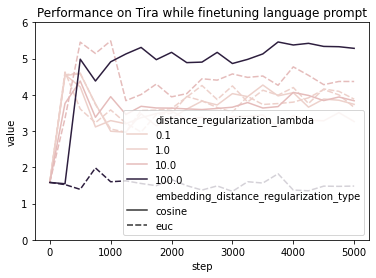

In [41]:
ax=sb.lineplot(
    df[
        (df['tag']=='eval/tira-clean-split-swahili_cer')
        # (df['lang_prompt']=='croatian')
    ],
    x='step',
    y='value',
    hue='distance_regularization_lambda',
    errorbar=None,
    style='embedding_distance_regularization_type',
)
ax.set(ylim=(0, 6))
ax.set_title('Performance on Tira while finetuning language prompt')

Text(0.5, 1.0, 'Performance on English while finetuning language prompt for Tira')

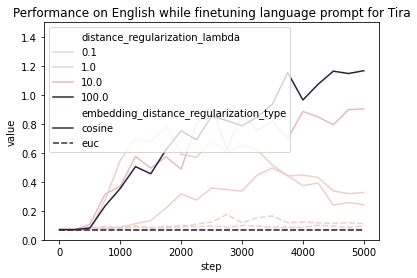

In [40]:
ax=sb.lineplot(
    df[
        (df['tag']=='eval/fl_en-en_cer')
        # (df['lang_prompt']=='croatian')
    ],
    x='step',
    y='value',
    hue='distance_regularization_lambda',
    errorbar=None,
    style='embedding_distance_regularization_type',
)
ax.set(ylim=(0, 1.5))
ax.set_title('Performance on English while finetuning language prompt for Tira')